## 점진적학습 - 확률적경사하강법

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import platform

# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [18]:
# 데이터 불러오기
fish = pd.read_csv('./data/07_fish.csv')

In [15]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [13]:
print(len(fish))

159


In [19]:
# 데이터 전처리 - 결측치, 이상치 확인
fish.info()
fish.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [17]:
fish[fish.duplicated()]

,Species,Weight,Length,Diagonal,Height,Width


In [34]:
# 데이터전처리 - 독립변수, 종속변수 분리
# 독립변수 : fish_input
# 종속변수 : fish_target
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_target = fish['Species']

In [35]:
fish_input = fish_input.to_numpy()
fish_target= fish_target.to_numpy()

In [36]:
print(fish_input.shape)
print(fish_target.shape)

(159, 5)
(159,)


In [45]:
# 훈련데이터, 테스트데이터 랜덤하게 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(fish_input, fish_target, test_size=0.25 ,random_state= 42)

In [47]:
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(119, 5)
(119,)
(40, 5)
(40,)


In [51]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [90]:
# 사용클래스(모델) : SGDClassifier
from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
sc = SGDClassifier(loss ='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print('SGDC 훈련데이터 정확도 :', sc.score(train_scaled, train_target))
print('SGDC 테스트데이터 정확도 :', sc.score(test_scaled, test_target))

# <해석>

SGDC 훈련데이터 정확도 : 0.773109243697479
SGDC 테스트데이터 정확도 : 0.775


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [91]:
# 점진적 학습 시작
# 새로운 데이터가 들어왔다고 가정
sc.partial_fit(train_scaled, train_target)
print('SGDC 훈련데이터 정확도 :', sc.score(train_scaled, train_target))
print('SGDC 테스트데이터 정확도 :', sc.score(test_scaled, test_target))

SGDC 훈련데이터 정확도 : 0.8151260504201681
SGDC 테스트데이터 정확도 : 0.85


In [92]:
# 에포크 반복횟수 찾기
sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0,300) :
    sc.partial_fit(train_scaled, train_target, classes= classes)
    
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))    

In [99]:
print('SGDC 훈련데이터 리스트 갯수 :', len(train_score))
print('SGDC 테스트데이터 리스트 갯수 :', len(test_score))

SGDC 훈련데이터 리스트 갯수 : 300
SGDC 테스트데이터 리스트 갯수 : 300


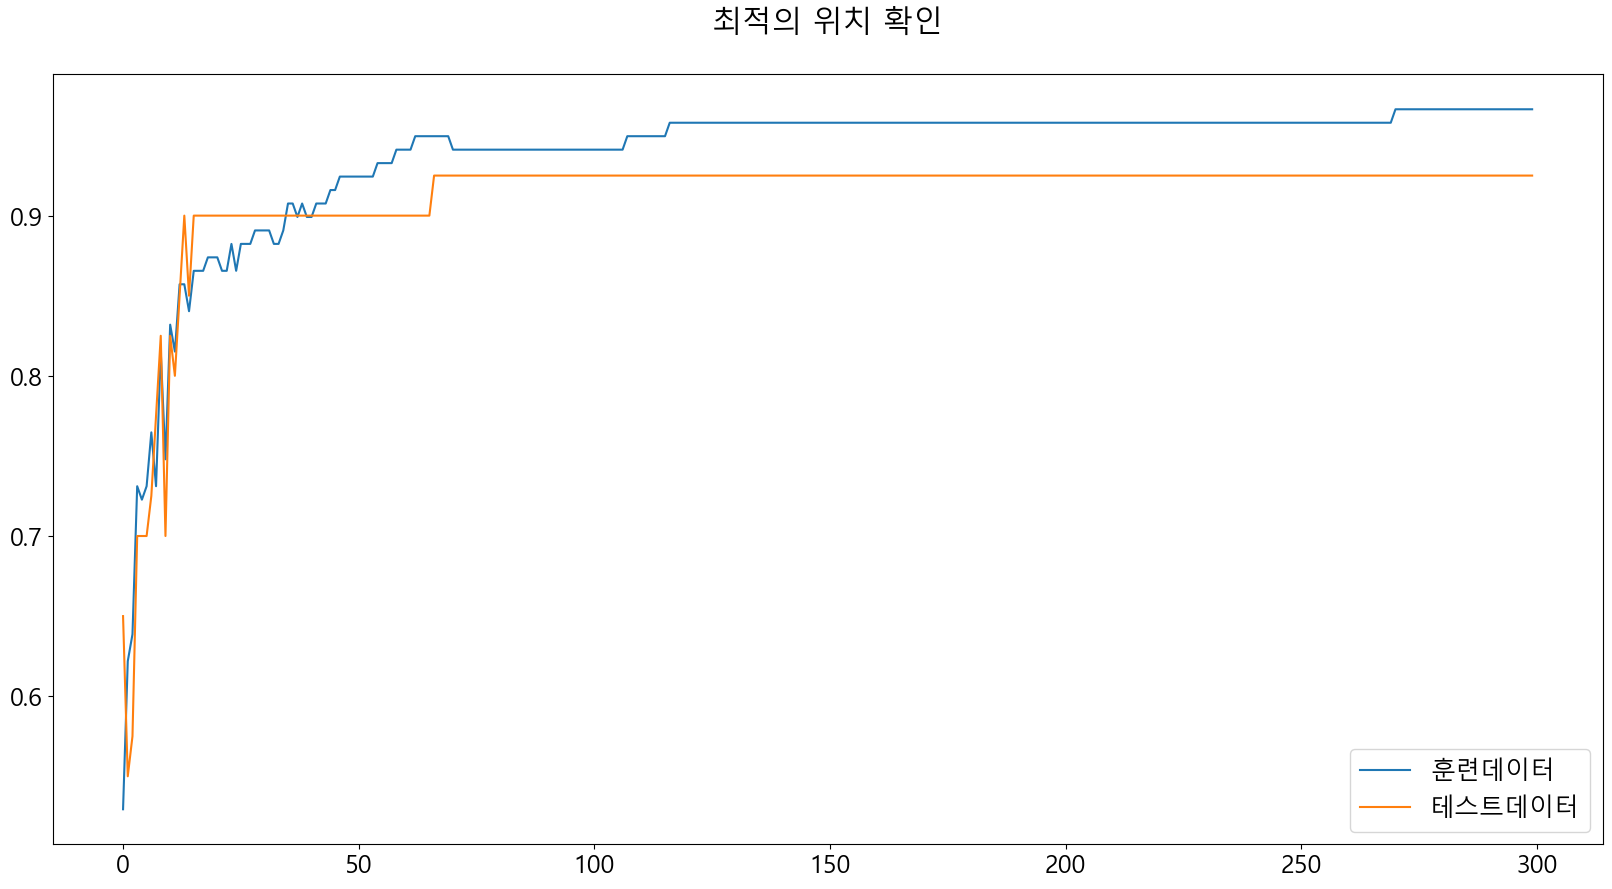

In [111]:
# 시각화를 통해 최적의 위치 찾기
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)
plt.title('최적의 위치 확인', pad=30)
plt.plot(train_score, label = '훈련데이터')
plt.plot(test_score, label = '테스트데이터')
plt.legend(loc = 'lower right')
plt.show()

In [113]:
# 시각화를 토대로 테스트 횟수 재지정

# 사용클래스(모델) : SGDClassifier
from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
# tol : 지정횟수만큼 강제 진행
sc = SGDClassifier(loss ='log', max_iter=100, tol=None ,random_state=42)
sc.fit(train_scaled, train_target)
print('SGDC 훈련데이터 정확도 :', sc.score(train_scaled, train_target))
print('SGDC 테스트데이터 정확도 :', sc.score(test_scaled, test_target))

SGDC 훈련데이터 정확도 : 0.957983193277311
SGDC 테스트데이터 정확도 : 0.925


In [114]:
# 모델 예측값 데이터 프레임에 저장하기
# 신규데이터 = 기존의 fish 데이터라고 가정
# 데이터프레임에 예측결과에 대한 Species_pred 컬럼 추가


# <출력결과 >
# Species_pred가 추가된 데이터프레임 출력

# 정답을 맞춘 갯수와 틀린 갯수 출력하기

# 정답률과 오답률 출력하기

In [129]:
# 에측데이터 불러오기
fish_pred = pd.read_csv('./data/07_fish.csv')
fish_pred_input = fish_pred[['Weight','Length','Diagonal','Height','Width']]
fish_pred_input =fish_pred_input.to_numpy()

In [168]:
# 예측데이터 정규화
pred_scaled = ss.transform(fish_pred_input)

In [169]:
pred_scaled.shape

(159, 5)

In [170]:
# 에측하기
Species_pred = sc.predict(pred_scaled)

In [171]:
# 예측한 결과 컬럼으로 저장
fish_pred['Species_pred'] = Species_pred

In [172]:
# Species_pred 컬럼이 추가된 데이터프레임 출력
fish_pred

,Species,Weight,Length,Diagonal,Height,Width,Species_pred
0,Bream,242.0,25.4,30.0,11.5200,4.0200,Bream
1,Bream,290.0,26.3,31.2,12.4800,4.3056,Bream
2,Bream,340.0,26.5,31.1,12.3778,4.6961,Bream
3,Bream,363.0,29.0,33.5,12.7300,4.4555,Bream
4,Bream,430.0,29.0,34.0,12.4440,5.1340,Bream
...,...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936,Smelt
155,Smelt,13.4,12.4,13.5,2.4300,1.2690,Smelt
156,Smelt,12.2,13.0,13.8,2.2770,1.2558,Smelt
157,Smelt,19.7,14.3,15.2,2.8728,2.0672,Smelt


In [184]:
# 정답을 맞춘 갯수와 틀린 갯수 출력하기
# 총 갯수
fish_len = len(fish_pred)
# 정답 갯수
fish_len_y = len(fish_pred[fish_pred['Species'] == fish_pred['Species_pred']])

# 오답 갯수
fish_len_n = len(fish_pred[fish_pred['Species'] != fish_pred['Species_pred']])

print('총 갯수 [{}]건 중에, 정답 갯수 [{}]건, 오답 갯수 [{}]건'.format(fish_len, fish_len_y, fish_len_n))

print('----------------------------------------------------------------------------------')

# 정답률과 오답률 출력하기
# 정답률
y_per = round(fish_len_y / fish_len * 100,2)

# 오답률
n_per = round(fish_len_n / fish_len * 100,2)

# 전체 확률(100%)
all_per = y_per + n_per

print('총 [{}%] 중dp 정답률 [{}%], 오답률 [{}%]'.format(all_per, y_per, n_per))

총 갯수 [159]건 중에, 정답 갯수 [151]건, 오답 갯수 [8]건
----------------------------------------------------------------------------------
총 [100.0%] 중dp 정답률 [94.97%], 오답률 [5.03%]
